In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("mcs_ds_edited_iter_shuffled.csv")
df.head()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
0,30,15,200,40,0.773546,0.250555
1,15,15,100,70,0.911941,0.498329
2,30,15,100,50,0.814867,0.255546
3,15,20,100,20,1.435332,0.394603
4,30,15,100,40,1.265909,0.302943


In [4]:
print(df.columns)

Index(['anchor_ratio', 'trans_range', 'node_density', 'iterations', 'ale',
       'sd_ale'],
      dtype='object')


In [5]:
df.isna().sum()

anchor_ratio    0
trans_range     0
node_density    0
iterations      0
ale             0
sd_ale          0
dtype: int64

In [6]:
import plotly.express as px

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

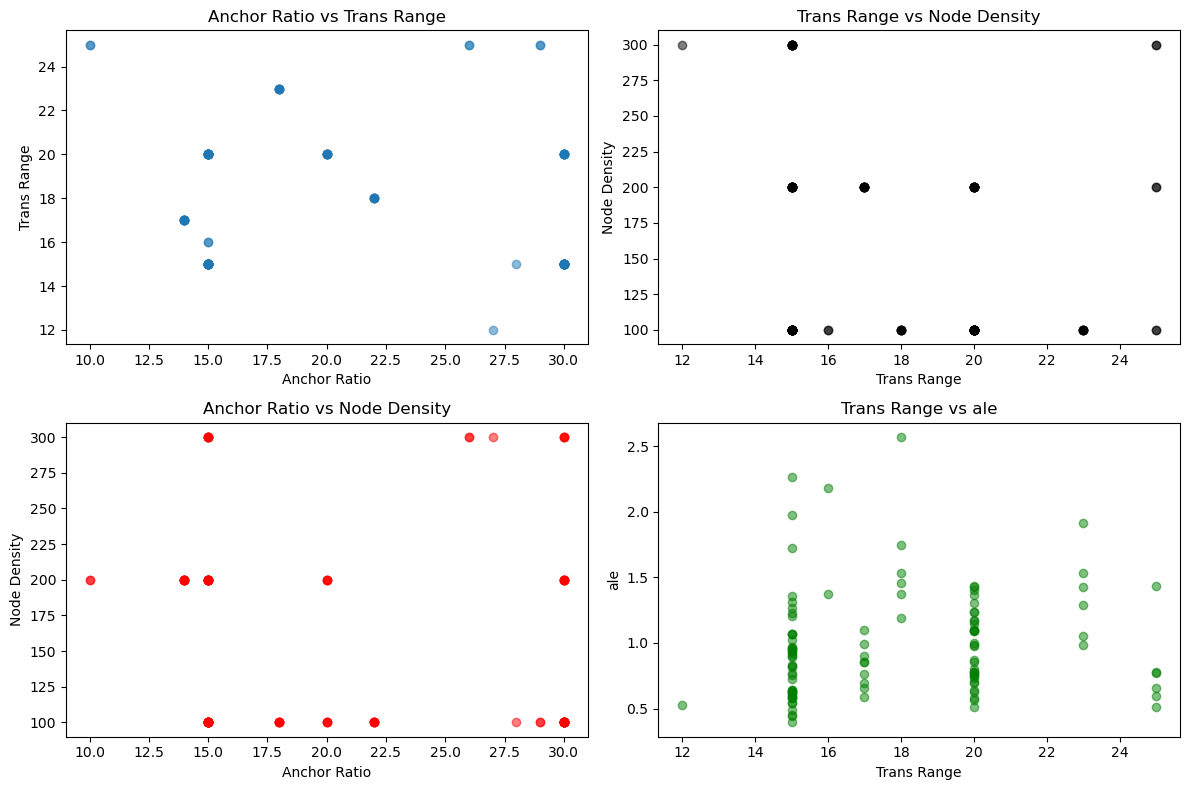

In [34]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.scatter(df['anchor_ratio'],df['trans_range'],alpha=0.5)
plt.title('Anchor Ratio vs Trans Range')
plt.xlabel('Anchor Ratio')
plt.ylabel('Trans Range')


plt.subplot(2,2,2)
plt.scatter(df['trans_range'],df['node_density'],color='black',alpha=0.5)
plt.title('Trans Range vs Node Density')
plt.xlabel('Trans Range')
plt.ylabel('Node Density')

plt.subplot(2,2,3)
plt.scatter(df['anchor_ratio'],df['node_density'],color='red',alpha=0.5)
plt.title('Anchor Ratio vs Node Density')
plt.xlabel('Anchor Ratio')
plt.ylabel('Node Density')

plt.subplot(2,2,4)
plt.scatter(df['trans_range'],df['ale'],color='green',alpha=0.5)
plt.title('Trans Range vs ale')
plt.xlabel('Trans Range')
plt.ylabel('ale')
plt.tight_layout()


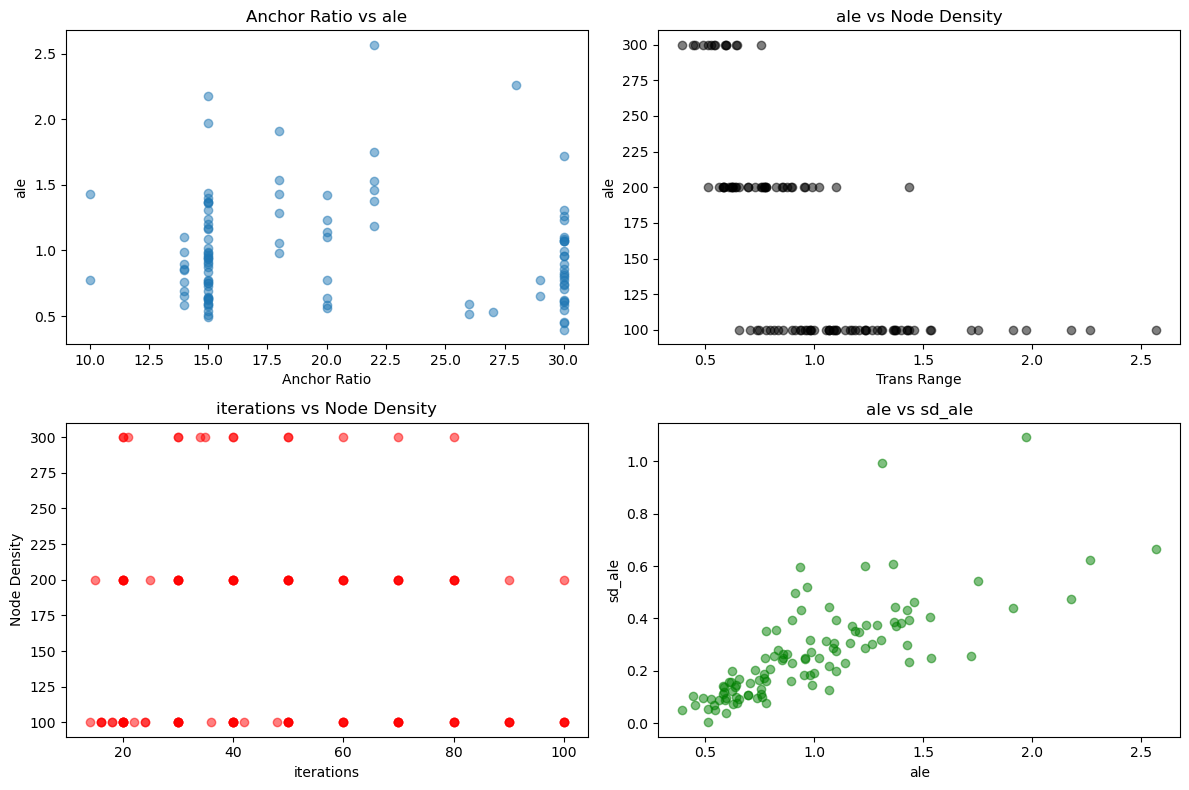

In [35]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.scatter(df['anchor_ratio'],df['ale'],alpha=0.5)
plt.title('Anchor Ratio vs ale')
plt.xlabel('Anchor Ratio')
plt.ylabel('ale')


plt.subplot(2,2,2)
plt.scatter(df['ale'],df['node_density'],color='black',alpha=0.5)
plt.title('ale vs Node Density')
plt.xlabel('Trans Range')
plt.ylabel('ale')

plt.subplot(2,2,3)
plt.scatter(df['iterations'],df['node_density'],color='red',alpha=0.5)
plt.title('iterations vs Node Density')
plt.xlabel('iterations')
plt.ylabel('Node Density')

plt.subplot(2,2,4)
plt.scatter(df['ale'],df['sd_ale'],color='green',alpha=0.5)
plt.title('ale vs sd_ale')
plt.xlabel('ale')
plt.ylabel('sd_ale')
plt.tight_layout()

In [36]:
mean_vector = df.mean()
print("Mean Vector:\n", mean_vector)

Mean Vector:
 anchor_ratio     20.523364
trans_range      17.878505
node_density    159.813084
iterations       47.887850
ale               0.983471
sd_ale            0.265692
dtype: float64


In [37]:
covariance_matrix = df.cov()
print("\nCovariance Matrix:\n", covariance_matrix)



Covariance Matrix:
               anchor_ratio  trans_range  node_density  iterations        ale  \
anchor_ratio     45.421619    -1.982984    -56.127667    3.851702  -0.206382   
trans_range      -1.982984     9.654911    -53.985188  -15.277905   0.138683   
node_density    -56.127667   -53.985188   5067.889261 -127.190972 -18.775467   
iterations        3.851702   -15.277905   -127.190972  608.553342  -4.033025   
ale              -0.206382     0.138683    -18.775467   -4.033025   0.166720   
sd_ale           -0.129355    -0.043584     -8.343814   -0.900144   0.055709   

                sd_ale  
anchor_ratio -0.129355  
trans_range  -0.043584  
node_density -8.343814  
iterations   -0.900144  
ale           0.055709  
sd_ale        0.033633  


In [38]:
correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
               anchor_ratio  trans_range  node_density  iterations       ale  \
anchor_ratio      1.000000    -0.094692     -0.116986    0.023167 -0.074997   
trans_range      -0.094692     1.000000     -0.244055   -0.199315  0.109309   
node_density     -0.116986    -0.244055      1.000000   -0.072426 -0.645927   
iterations        0.023167    -0.199315     -0.072426    1.000000 -0.400394   
ale              -0.074997     0.109309     -0.645927   -0.400394  1.000000   
sd_ale           -0.104657    -0.076483     -0.639097   -0.198966  0.743958   

                sd_ale  
anchor_ratio -0.104657  
trans_range  -0.076483  
node_density -0.639097  
iterations   -0.198966  
ale           0.743958  
sd_ale        1.000000  


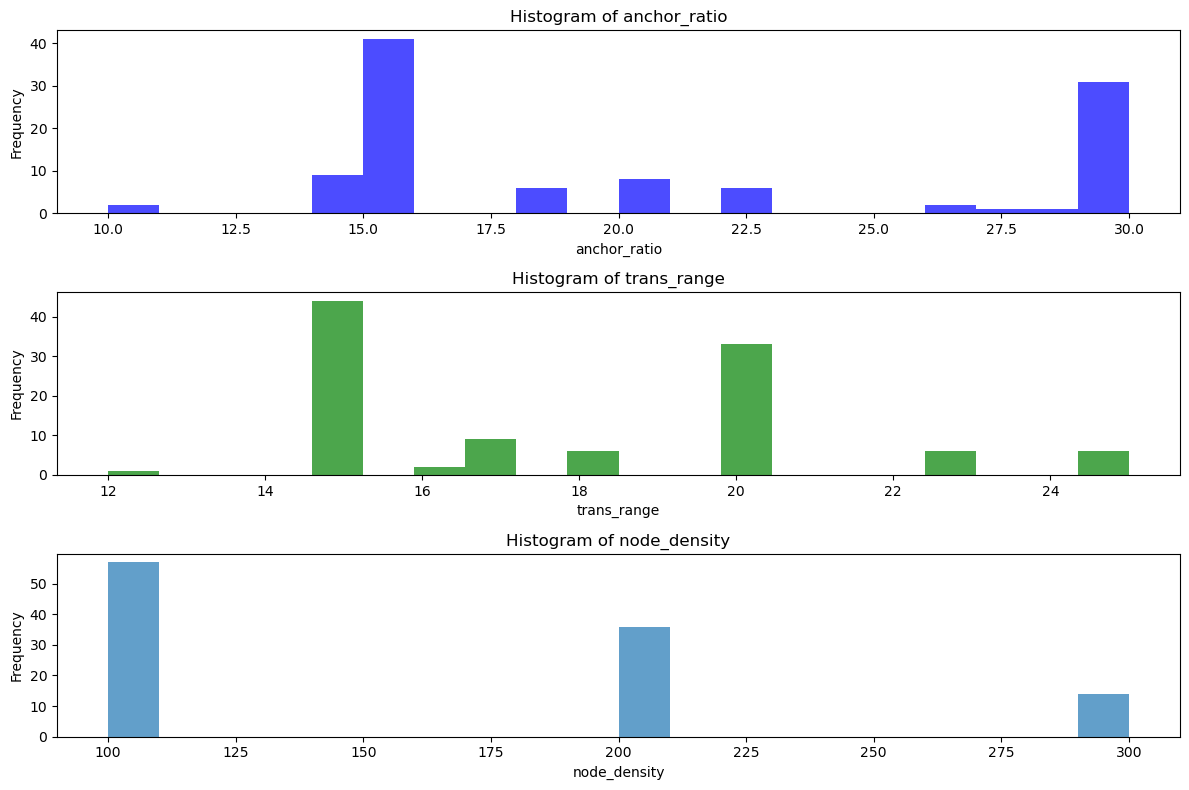

In [52]:
# 5. Histograms for each variable
plt.figure(figsize=(12,8))


plt.subplot(3, 1, 1)
plt.hist(df['anchor_ratio'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of anchor_ratio')
plt.xlabel('anchor_ratio')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.hist(df['trans_range'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of trans_range')
plt.xlabel('trans_range')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
plt.hist(df['node_density'], bins=20, alpha=0.7)
plt.title('Histogram of node_density')
plt.xlabel('node_density')
plt.ylabel('Frequency')



plt.tight_layout()
plt.show()


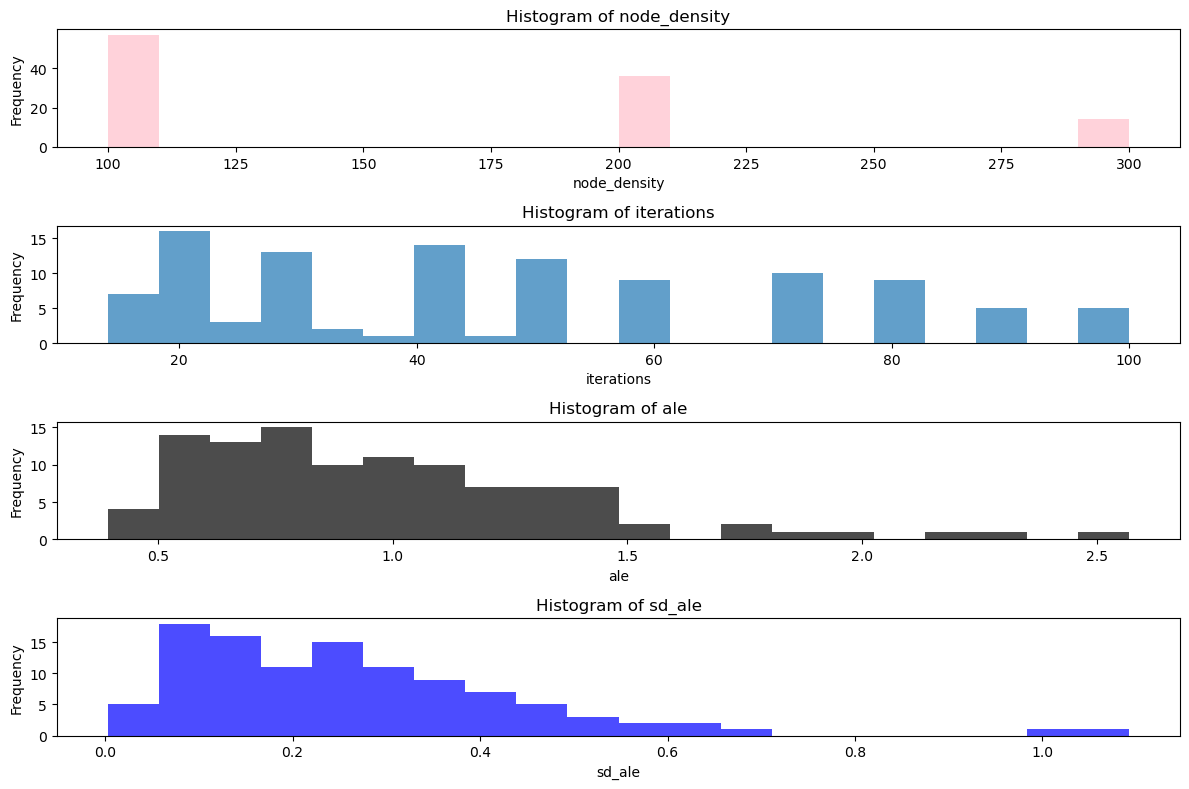

In [53]:
plt.figure(figsize=(12,8))
plt.subplot(4, 1, 1)
plt.hist(df['node_density'], bins=20, color='pink', alpha=0.7)
plt.title('Histogram of node_density')
plt.xlabel('node_density')
plt.ylabel('Frequency')

plt.subplot(4, 1, 2)
plt.hist(df['iterations'], bins=20,  alpha=0.7)
plt.title('Histogram of iterations')
plt.xlabel('iterations')
plt.ylabel('Frequency')

plt.subplot(4, 1, 3)
plt.hist(df['ale'], bins=20, color='black', alpha=0.7)
plt.title('Histogram of ale')
plt.xlabel('ale')
plt.ylabel('Frequency')

plt.subplot(4, 1, 4)
plt.hist(df['sd_ale'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of sd_ale')
plt.xlabel('sd_ale')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()